In [63]:
# Import Libraries and Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns  

In [64]:
# Bring in my dataset

diabetes = pd.read_csv('https://raw.githubusercontent.com/psalinas505/python-diabetes/main/diabetes.csv')

In [3]:
## Cleaning data after exploration and analysis

# Removing zero values from BMI, Glucose, and BloodPressure
# Age has no zero's; Pregnancy is not needed to remove, since that just means zero prior pregnancies; DiabetesPedigreeFunction has no zeros

df0 = diabetes.query('BMI != 0 & Glucose !=0 & BloodPressure != 0')

In [4]:
#diabetes = df0

In [65]:
# And examine the dataset 

df0.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [66]:
print(df0.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [7]:
## create correlation matrix with coefficients

In [67]:
cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_std = stdsc.fit_transform(df0[cols].iloc[:,range(0,len(cols))].values)


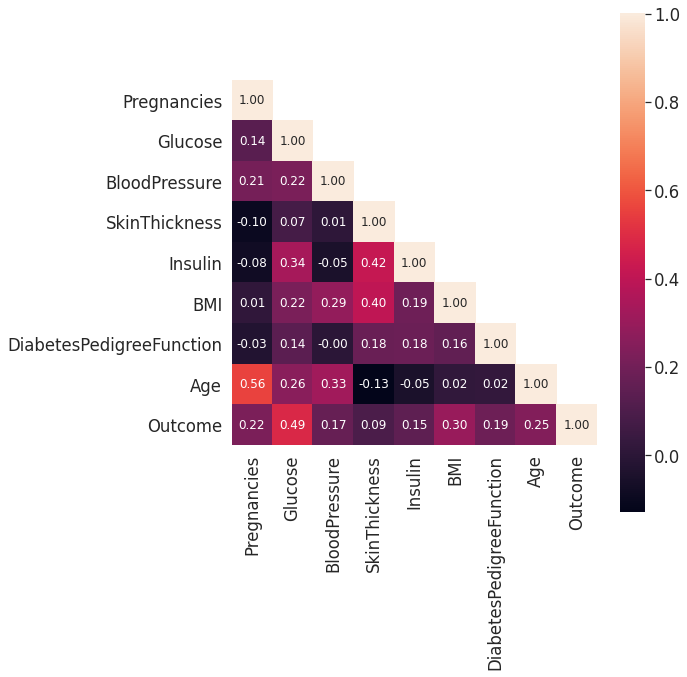

In [69]:
cov_mat =np.cov(X_std.T)
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)

#mask to eliminate flipped data
mask = np.zeros_like(cov_mat)
mask[np.triu_indices_from(mask)] = True
np.fill_diagonal(mask, 0.0)

with sns.axes_style("white"):
    hm = sns.heatmap(cov_mat,
                     mask=mask,
                     cbar=True,
                     annot=True,
                     square=True,
                     fmt='.2f',
                     annot_kws={'size': 12},
                     yticklabels=cols,
                     xticklabels=cols)
plt.tight_layout()
plt.show()

In [71]:
# select features with coeff > 0.15
cols_selected = ['Glucose', 'BMI', 'Age', 'Pregnancies', 'BloodPressure']#, 'Insulin', 'DiabetesPedigreeFunction', ]

In [72]:
## split the data (train - test)
from sklearn.model_selection import train_test_split

X = df0[cols_selected].iloc[:,0:6].values     
y = df0['Outcome']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)

In [56]:
## Normalize inputs ##

means= np.mean(X_train, axis=0)
stds= np.std(X_train, axis=0)

# check values
print(means)
print(stds)

X_train= (X_train - means)/stds
X_test= (X_test - means)/stds

print(X_train.shape)
print(X_test.shape)

[120.97236615  32.51329879  32.88255613   3.68393782   0.4753506
  72.42314335]
[30.66779935  6.94725348 11.61872809  3.31197665  0.33519747 12.37645893]
(579, 6)
(145, 6)


In [73]:
####################################
## BINARY CLASSIFICATION ALGORITHMS
####################################
## 1. Logistic Regression
## 2. KNearest Neighbors
## 3. Decision Trees
## 4. Support Vector Machine (SVM)
####################################

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
#from sklearn.neural_network import MLPClassifier

from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [75]:
# 1. define classifiers 

classifiers = {
    'Logistic Regression': LogisticRegression(C=1e3), #C=1e5
    
    'KNearest Neighbors': KNeighborsClassifier(),    
    
    'Decision Trees': DecisionTreeClassifier(min_samples_leaf=6, max_depth=5),
    
    'Support Vector Machine (SVM)': svm.SVC(kernel='linear', C=0.01), #kernel='sigmoid') #kernel='linear', C=0.01
    
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=0),
    
    #'Neural Network': MLPClassifier(solver='lbfgs', alpha=1e-1, hidden_layer_sizes=(5,2), random_state=0)
}

Logistic Regression: Errors= 32
Accuracy Score= 
0.7793103448275862
Confussion  Matrix: 
[[79 14]
 [18 34]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        97
           1       0.65      0.71      0.68        48

    accuracy                           0.78       145
   macro avg       0.75      0.76      0.76       145
weighted avg       0.78      0.78      0.78       145

Acc Model Logistic Regression= 77.93103448275862 %
-------------------------------------------------------------
KNearest Neighbors: Errors= 32
Accuracy Score= 
0.7793103448275862
Confussion  Matrix: 
[[82 17]
 [15 31]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.85      0.84        97
           1       0.67      0.65      0.66        48

    accuracy                           0.78       145
   macro avg       0.75      0.75      0.75       145
weighted avg       0.78  

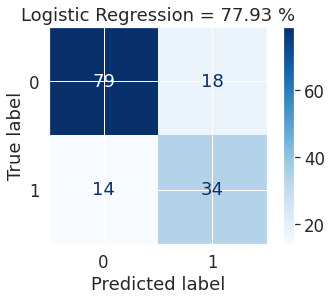

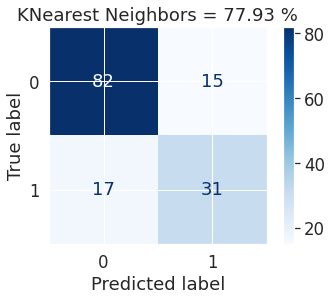

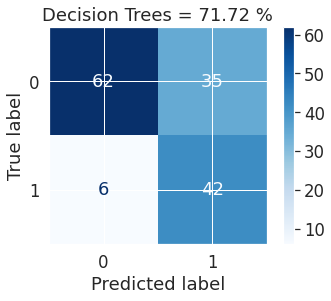

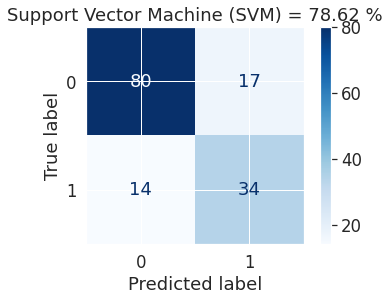

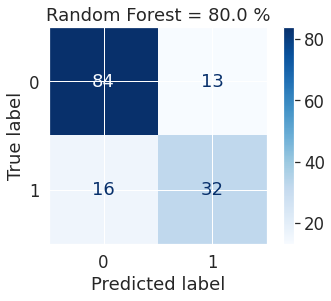

In [76]:
for i, (clf_name, clf) in enumerate(classifiers.items()):
    
    # fit the data and tag the outliers
    if clf_name == 'Logistic Regression':
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
    elif clf_name == 'KNearest Neighbors':
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
    elif clf_name == 'Decision Trees':
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
    elif clf_name == 'Support Vector Machine (SVM)':
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
    elif clf_name == 'Random Forest':
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
    elif clf_name == 'Neural Network':
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
    #calculate number of errors
    n_errors = (y_pred != y_test).sum()
    
    #run classification metrics
    print(f'{clf_name}: Errors= {n_errors}')
    print('Accuracy Score= ')
    print(clf.score(X_test, y_test))
    print('Confussion  Matrix: ')
    print(confusion_matrix(y_pred, y_test))
    print('Classification Report: ')
    print(classification_report(y_test, y_pred))
    
    # plot confusion matrix

    #                predicted labels and true labels
    #print('Confusion Matrix', confusion_matrix(y_pred, y))
    plot = plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)
    plot.ax_.set_title(clf_name + f' = { round(clf.score(X_test, y_test)*100, 2)} %')
    
    print(f"Acc Model {clf_name}= {clf.score(X_test, y_test)*100} %")
    print('-------------------------------------------------------------')